 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import math 
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("03-Python-Pandas_Homework_Instructions_Starter_Code_Resources_whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)

In [3]:
# Count nulls
print("\nWhale Returns Data:")
print(whale_returns.isnull().sum())
print("\nWhale Data Types")
print(whale_returns.dtypes)


Whale Returns Data:
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

Whale Data Types
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object


In [4]:
# Drop nulls
whale_returns.dropna(inplace = True)
whale_returns.sort_index(inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = Path("03-Python-Pandas_Homework_Instructions_Starter_Code_Resources_algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)

In [6]:
# Count nulls
print("\nAlgo Returns Data:")
print(algo_returns.isnull().sum())
print("\nAlgo Data Types:")
print(algo_returns.dtypes)


Algo Returns Data:
Algo 1    0
Algo 2    6
dtype: int64

Algo Data Types:
Algo 1    float64
Algo 2    float64
dtype: object


In [7]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.sort_index(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_historical_path = Path("03-Python-Pandas_Homework_Instructions_Starter_Code_Resources_sp500_history.csv")
sp500_historical = pd.read_csv(sp500_historical_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)

In [9]:
# Check Data Types
print("\nS&P 500 Data:")
print(sp500_historical.isnull().sum())
print("\nS&P 500Data Types:")
print(sp500_historical.dtypes)


S&P 500 Data:
Close    0
dtype: int64

S&P 500Data Types:
Close    object
dtype: object


In [10]:
# Fix Data Types
sp500_historical["Close"] = sp500_historical["Close"].str.replace("$", "")
sp500_historical = sp500_historical.astype("float64")

<ipython-input-10-a271fd88d13e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_historical["Close"] = sp500_historical["Close"].str.replace("$", "")


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_historical.sort_index().pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns = {"Close": "S&P 500 Daily Return"})
sp500_daily_returns.head()

,S&P 500 Daily Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_wasp500_data = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = "columns", join = "inner")
combined_wasp500_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

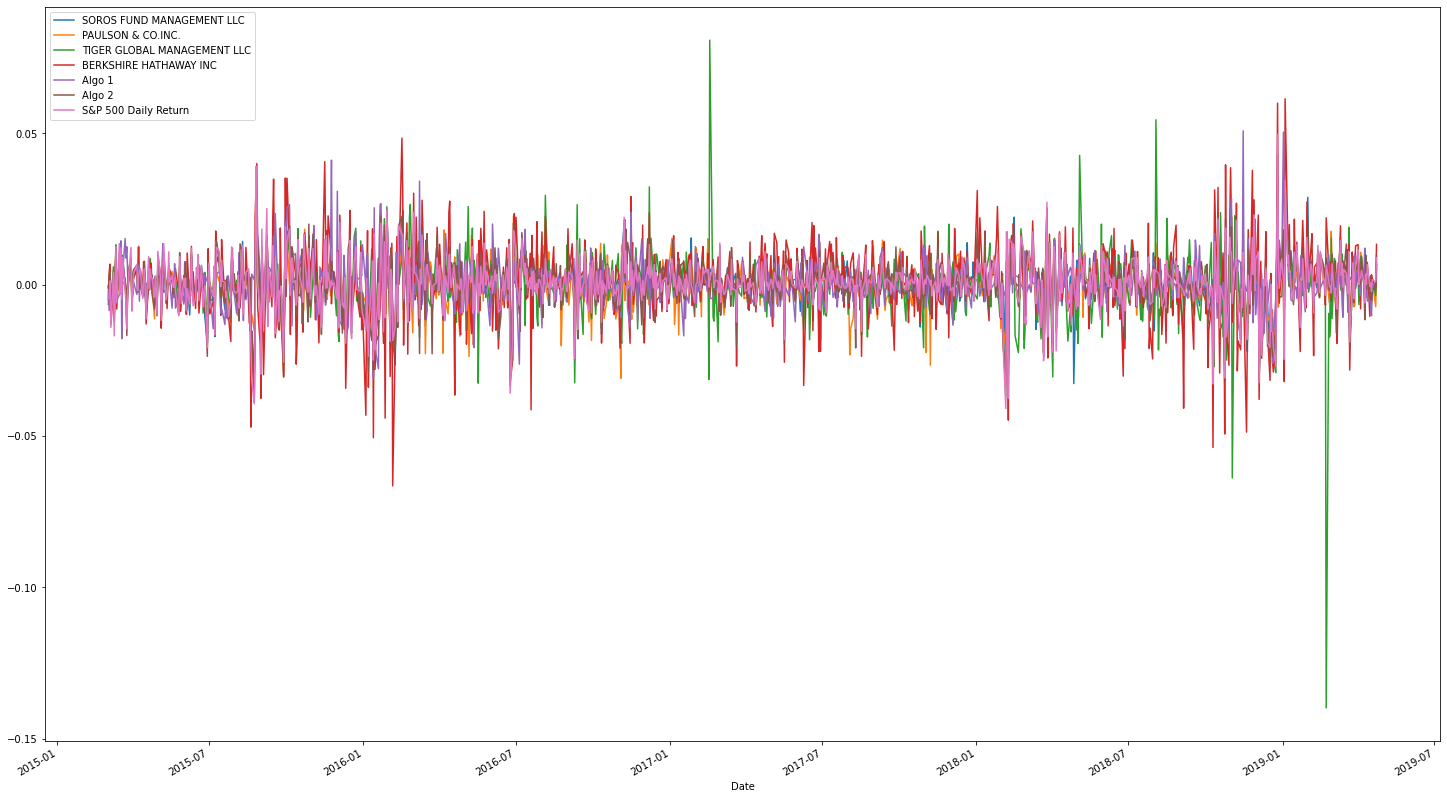

In [15]:
# Plot daily returns of all portfolios
combined_wasp500_data.plot(figsize=(25,15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

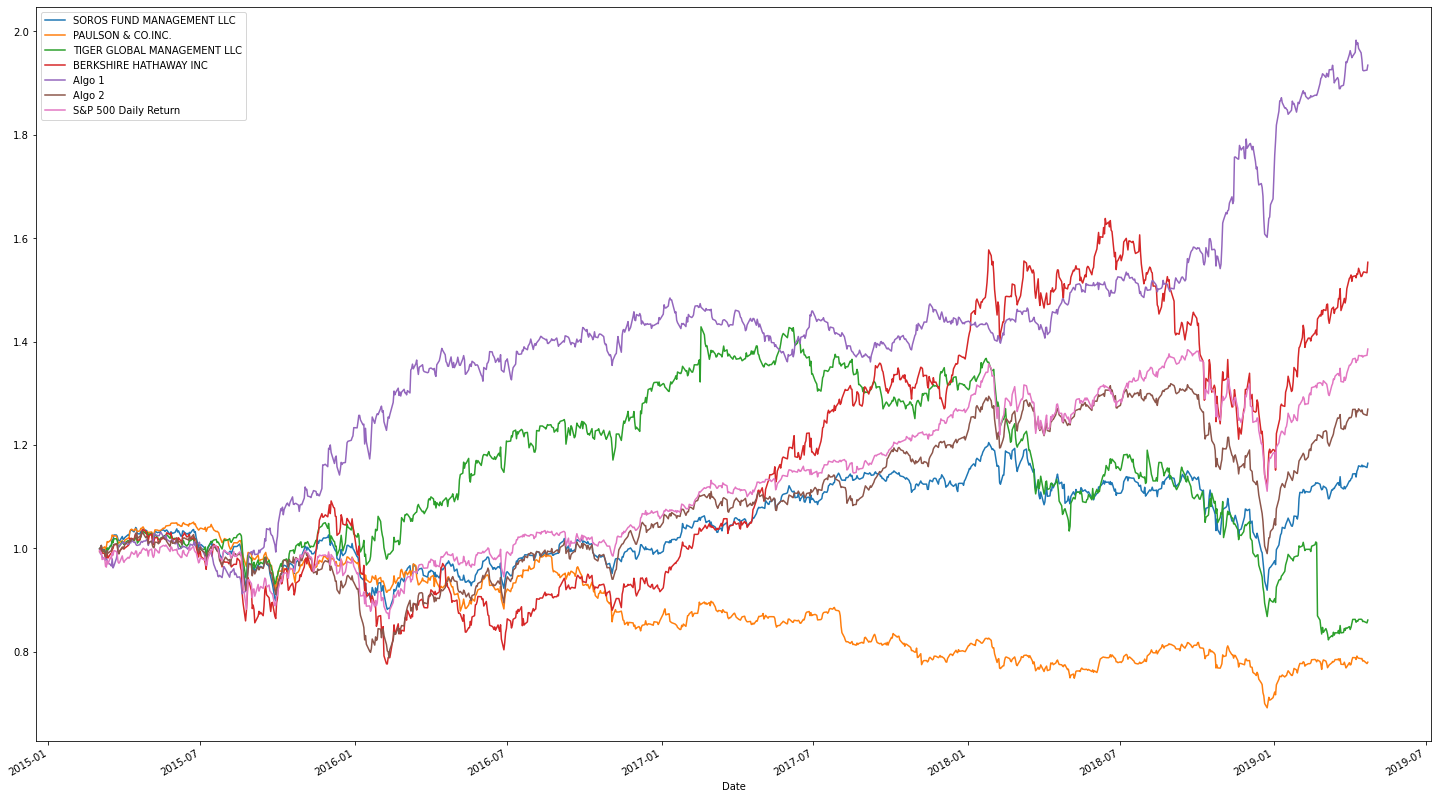

In [16]:
# Calculate cumulative returns of all portfolios
wasp_cumulative_returns = (1 + combined_wasp500_data).cumprod()

# Plot cumulative returns
wasp_cumulative_returns.plot(figsize=(25,15))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

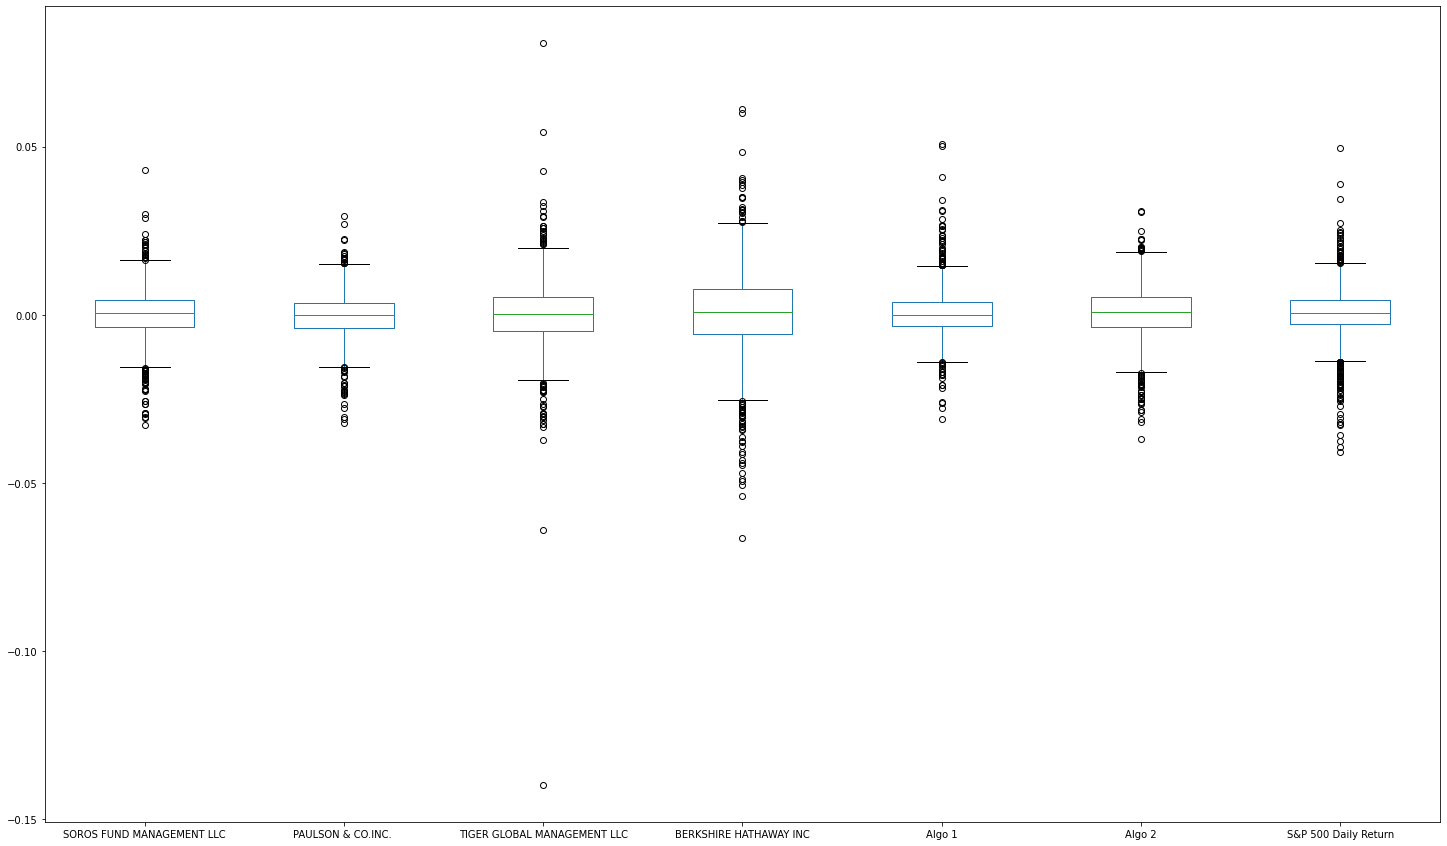

In [17]:
# Box plot to visually show risk
combined_wasp500_data.plot(kind = "box", figsize = (25, 15))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
wasp_daily_std = combined_wasp500_data.std()
wasp_daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500 Daily Return           0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate the daily standard deviation of S&P 500

sp500_daily_std = wasp_daily_std.loc["S&P 500 Daily Return"]

# Determine which portfolios are riskier than the S&P 500

riskiest_std = wasp_daily_std[wasp_daily_std > sp500_daily_std]
riskiest_std 

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)

wasp_annualized_std = wasp_daily_std * math.sqrt(252)
wasp_annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500 Daily Return           0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

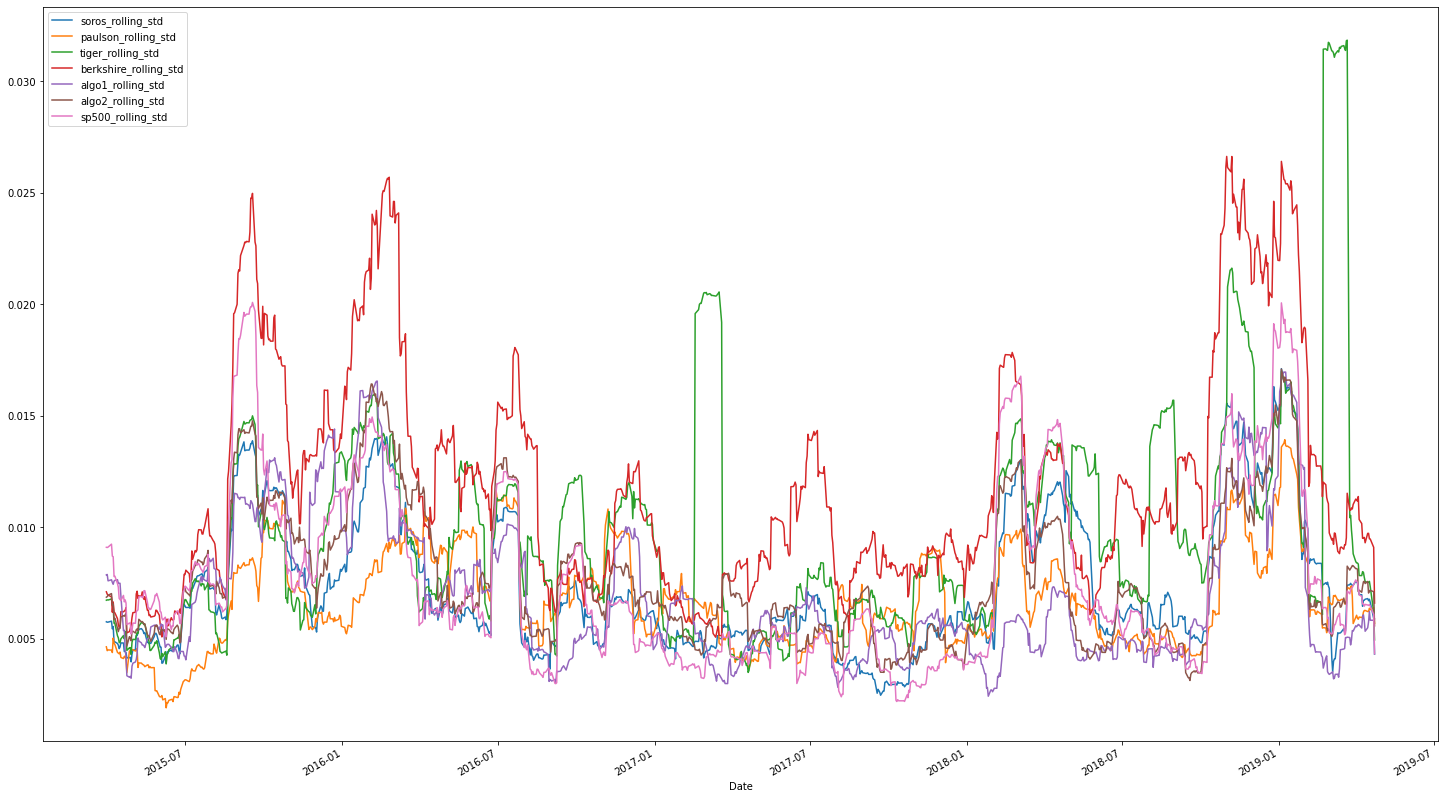

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

soros_rolling_std = combined_wasp500_data.iloc[:, 0].rolling(window = 21).std()
paulson_rolling_std = combined_wasp500_data.iloc[:, 1].rolling(window = 21).std()
tiger_rolling_std = combined_wasp500_data.iloc[:, 2].rolling(window = 21).std()
berkshire_rolling_std = combined_wasp500_data.iloc[:, 3].rolling(window = 21).std()
algo1_rolling_std = combined_wasp500_data.iloc[:, 4].rolling(window = 21).std()
algo2_rolling_std = combined_wasp500_data.iloc[:, 5].rolling(window = 21).std()
sp500_rolling_std = combined_wasp500_data.iloc[:, 6].rolling(window = 21).std()

# Plot the rolling standard deviation

ax1 = soros_rolling_std.plot(figsize = (25, 15))
paulson_rolling_std.plot(ax = ax1)
tiger_rolling_std.plot(ax = ax1)
berkshire_rolling_std.plot(ax = ax1)
algo1_rolling_std.plot(ax = ax1)
algo2_rolling_std.plot(ax = ax1)
sp500_rolling_std.plot(ax = ax1)

ax1.legend(["soros_rolling_std", "paulson_rolling_std", "tiger_rolling_std", "berkshire_rolling_std", "algo1_rolling_std", "algo2_rolling_std", "sp500_rolling_std"]);

### Calculate and plot the correlation

In [22]:
# Calculate the correlation

corr_matrix_wasp = combined_wasp500_data.corr()

# Display the correlation matrix

corr_matrix_wasp

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Return
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500 Daily Return,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

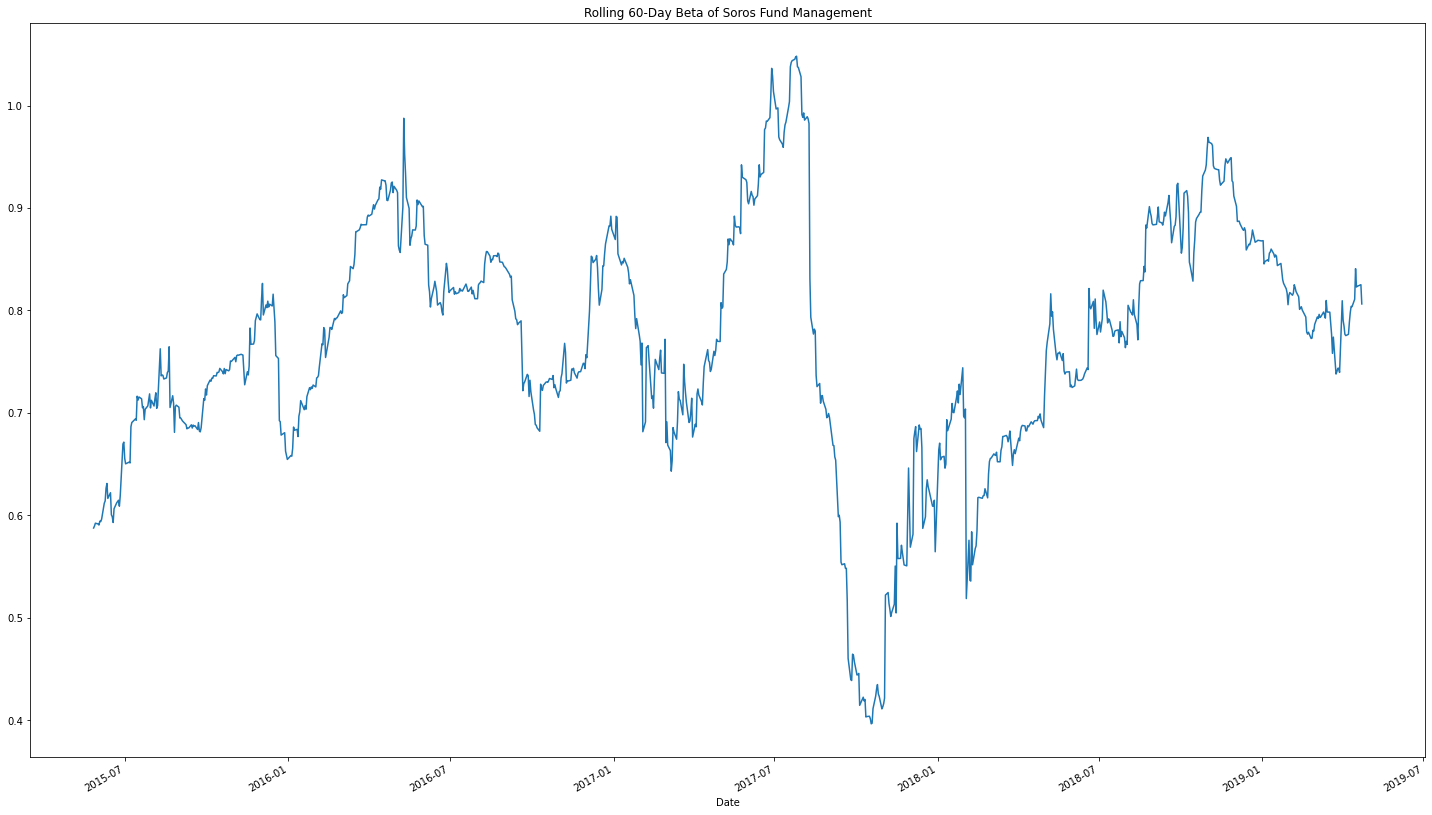

In [23]:
# Calculate covariance of a single portfolio

covariance_soros = combined_wasp500_data["SOROS FUND MANAGEMENT LLC"].cov(combined_wasp500_data["S&P 500 Daily Return"])
covariance_paulson = combined_wasp500_data["PAULSON & CO.INC. "].cov(combined_wasp500_data["S&P 500 Daily Return"])
covariance_tiger = combined_wasp500_data["TIGER GLOBAL MANAGEMENT LLC"].cov(combined_wasp500_data["S&P 500 Daily Return"])
covariance_berkshire = combined_wasp500_data["BERKSHIRE HATHAWAY INC"].cov(combined_wasp500_data["S&P 500 Daily Return"])
covariance_algo1 = combined_wasp500_data["Algo 1"].cov(combined_wasp500_data["S&P 500 Daily Return"])
covariance_algo2 = combined_wasp500_data["Algo 2"].cov(combined_wasp500_data["S&P 500 Daily Return"])

# Calculate variance of S&P 500

sp500_variance = combined_wasp500_data["S&P 500 Daily Return"].var()

# Computing beta

beta_soros = covariance_soros / sp500_variance
beta_paulson = covariance_paulson / sp500_variance
beta_tiger = covariance_tiger / sp500_variance
beta_berkshire = covariance_berkshire / sp500_variance
beta_algo1 = covariance_algo1 / sp500_variance
beta_algo2 = covariance_algo2 / sp500_variance

# Plot beta trend

rolling_covariance_soros = combined_wasp500_data["SOROS FUND MANAGEMENT LLC"].rolling(window = 60).cov(combined_wasp500_data["S&P 500 Daily Return"])
rolling_variance_sp500s = combined_wasp500_data["S&P 500 Daily Return"].rolling(window = 60).var()
rolling_beta_soros = rolling_covariance_soros / rolling_variance_sp500s
rolling_beta_soros.plot(figsize = (25, 15), title='Rolling 60-Day Beta of Soros Fund Management');

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

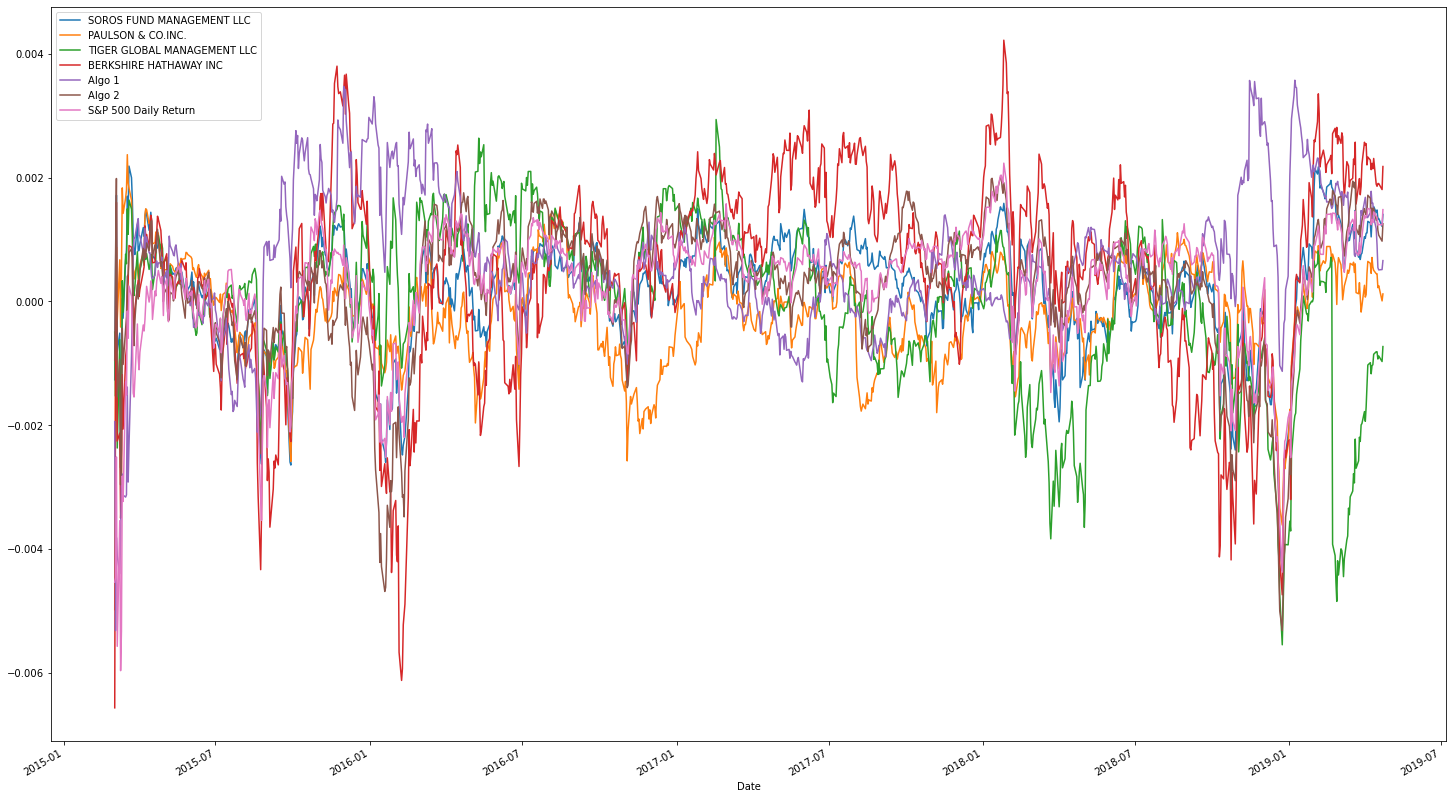

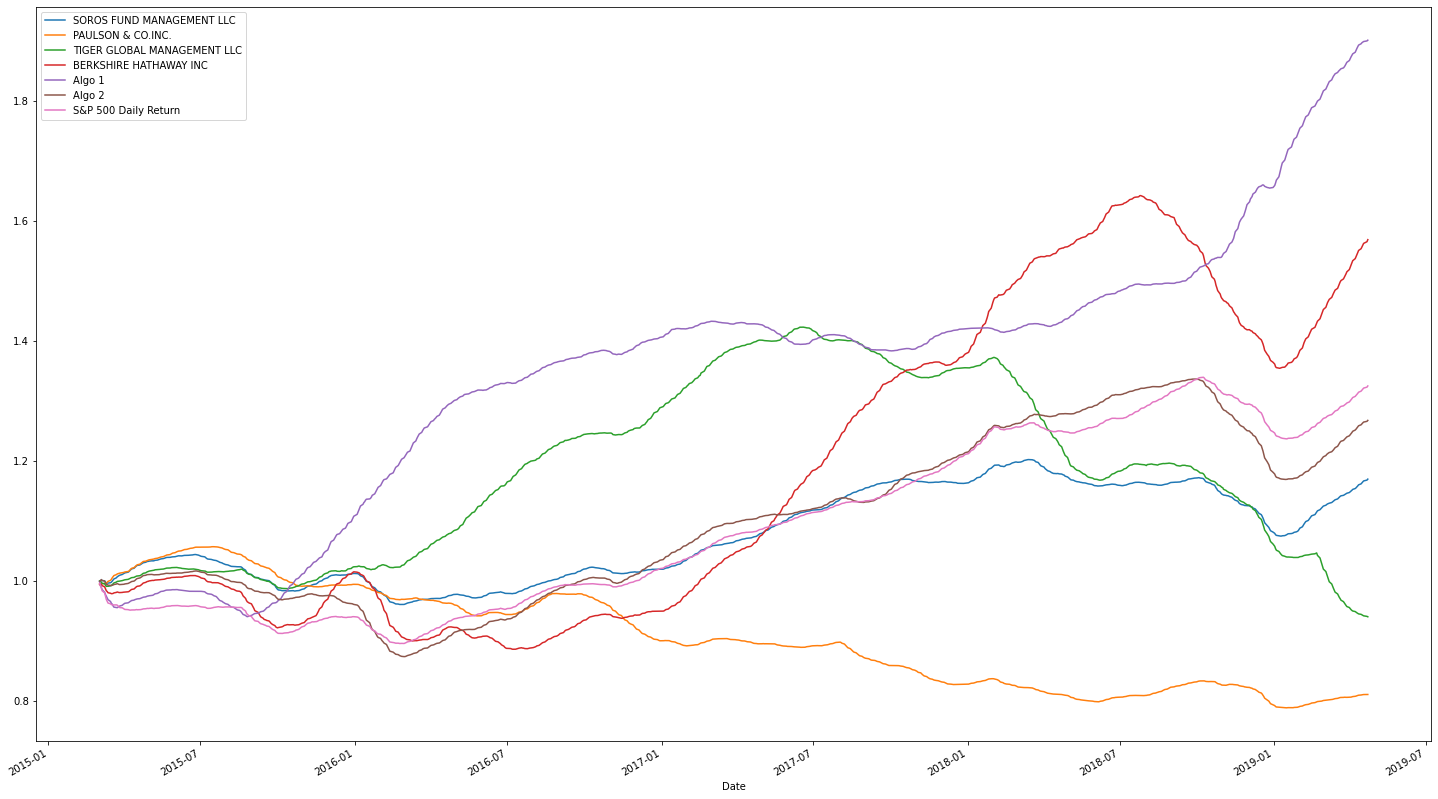

In [24]:
# Use `ewm` to calculate the rolling window

ewm_data = combined_wasp500_data.ewm(halflife = 21).mean()
ewm_data.plot(figsize = (25, 15));
ewm_cumulative_data = (1 + ewm_data).cumprod()
ewm_cumulative_data.plot(figsize = (25, 15));

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios

sharpe_ratio = (combined_wasp500_data.mean() * 252) / (combined_wasp500_data.std() * math.sqrt(252))
sharpe_ratio 

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500 Daily Return           0.648267
dtype: float64

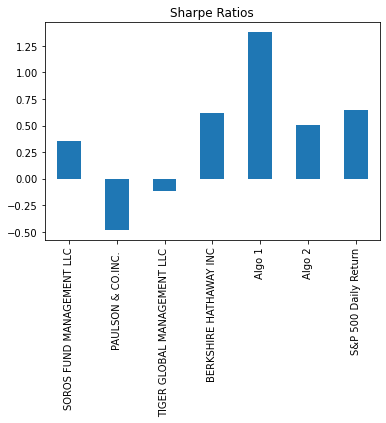

In [26]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio.plot(kind = "bar", title = "Sharpe Ratios");

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock
goog_path = Path("03-Python-Pandas_Homework_Instructions_Starter_Code_Resources_goog_historical.csv")
goog_data = pd.read_csv(goog_path, index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)

In [28]:
# Reading data from 2nd stock
aapl_path = Path("03-Python-Pandas_Homework_Instructions_Starter_Code_Resources_aapl_historical.csv")
aapl_data = pd.read_csv(aapl_path, index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)

In [29]:
# Reading data from 3rd stock
cost_path = Path("03-Python-Pandas_Homework_Instructions_Starter_Code_Resources_cost_historical.csv")
cost_data = pd.read_csv(cost_path, index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)

In [30]:
# Concatenate all stocks into a single DataFrame
personal_portfolio = pd.concat([goog_data, aapl_data, cost_data], axis = "columns", join = "inner")

In [31]:
# Reset Date index
personal_portfolio.sort_index(inplace = True)

In [32]:
# Reorganize portfolio data by having a column per symbol
columns = ["GOOG", "AAPL", "COST"]
personal_portfolio.drop(columns = "Symbol", inplace = True)
personal_portfolio.columns = columns

In [33]:
# Calculate daily returns
daily_returns = personal_portfolio.pct_change()

# Drop NAs

daily_returns.dropna(inplace = True)

# Display sample data

daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return (Using Dot Product from NumPy)

weighted_daily_returns = daily_returns.dot(weights)

# Display sample data 

weighted_daily_returns

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame

all_returns = pd.concat([weighted_daily_returns, combined_wasp500_data], axis = "columns", join = "inner")
all_returns = all_returns.rename(columns = {0: "TK Daily Return"})

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

all_returns.dropna(inplace = True)
all_returns.head()

,TK Daily Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Return
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
all_returns_daily_std = all_returns.std() * math.sqrt(252)
all_returns_daily_std

TK Daily Return                0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500 Daily Return           0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

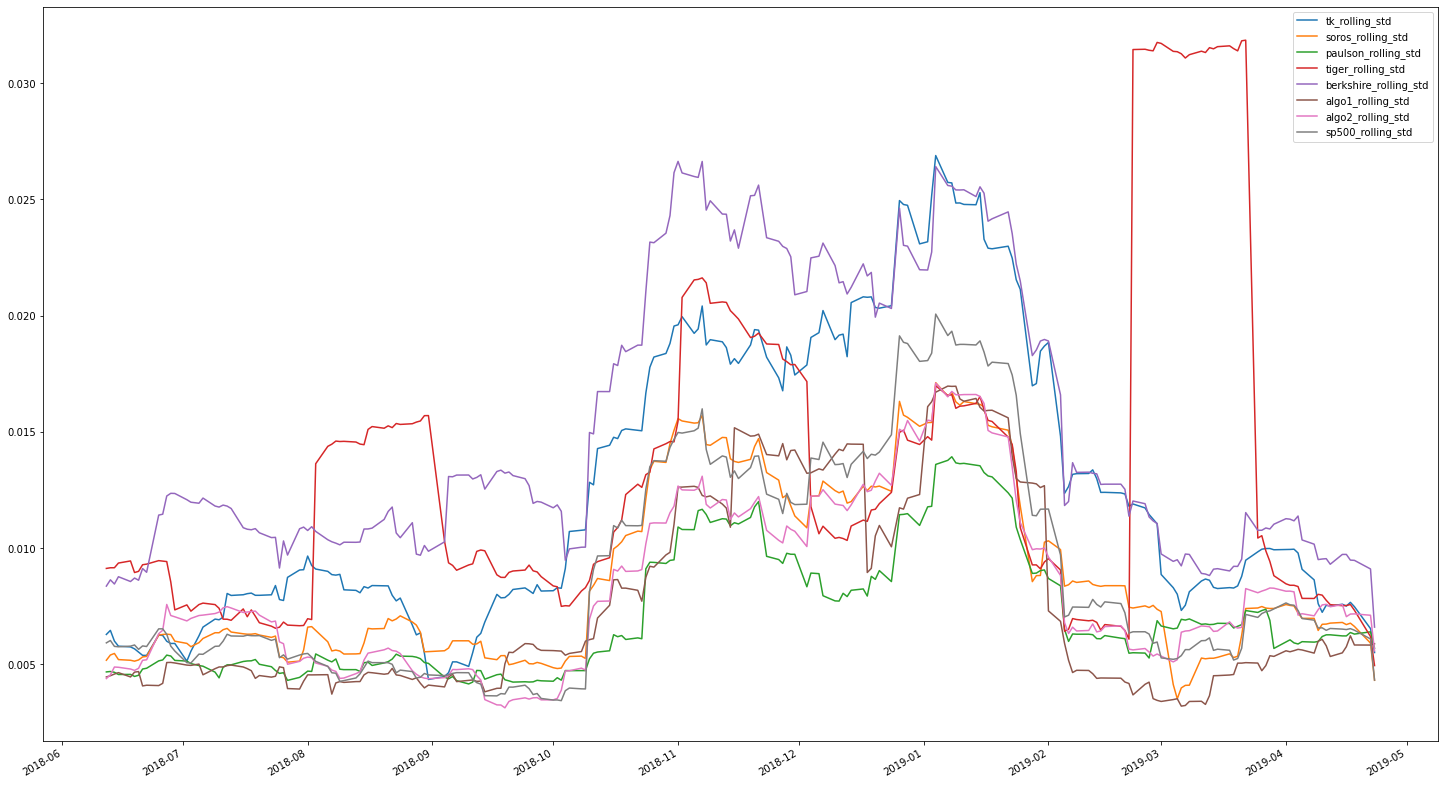

In [38]:
# Calculate rolling standard deviation

tk_rolling_std21 = all_returns.iloc[:, 0].rolling(window = 21).std()
soros_rolling_std21 = all_returns.iloc[:, 1].rolling(window = 21).std()
paulson_rolling_std21 = all_returns.iloc[:, 2].rolling(window = 21).std()
tiger_rolling_std21 = all_returns.iloc[:, 3].rolling(window = 21).std()
berkshire_rolling_std21 = all_returns.iloc[:, 4].rolling(window = 21).std()
algo1_rolling_std21 = all_returns.iloc[:, 5].rolling(window = 21).std()
algo2_rolling_std21 = all_returns.iloc[:, 6].rolling(window = 21).std()
sp500_rolling_std21 = all_returns.iloc[:, 7].rolling(window = 21).std()

# Plot rolling standard deviation

ax2 = tk_rolling_std21.plot(figsize = (25, 15))
soros_rolling_std21.plot(ax = ax2)
paulson_rolling_std21.plot(ax = ax2)
tiger_rolling_std21.plot(ax = ax2)
berkshire_rolling_std21.plot(ax = ax2)
algo1_rolling_std21.plot(ax = ax2)
algo2_rolling_std21.plot(ax = ax2)
sp500_rolling_std21.plot(ax = ax2)

ax2.legend(["tk_rolling_std", "soros_rolling_std", "paulson_rolling_std", "tiger_rolling_std", "berkshire_rolling_std", "algo1_rolling_std", "algo2_rolling_std", "sp500_rolling_std"]);


### Calculate and plot the correlation

In [39]:
# Calculate and plot the correlation

corr_matrix_all = all_returns.corr()

corr_matrix_all

,TK Daily Return,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Return
TK Daily Return,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.261471,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.739936,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
S&P 500 Daily Return,0.871875,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

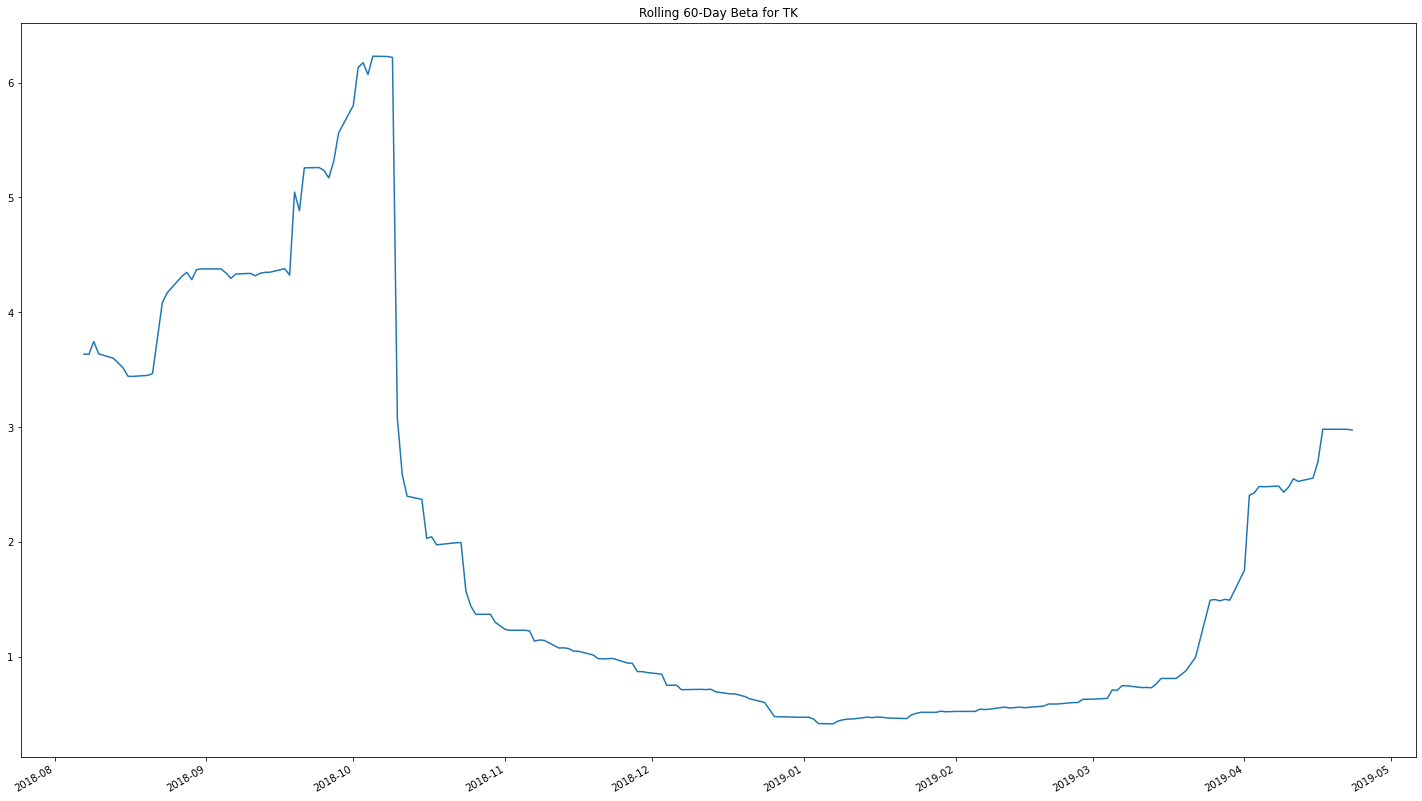

In [40]:
# Calculate and plot Beta

rolling_covariance_tk = all_returns["TK Daily Return"].cov(all_returns["S&P 500 Daily Return"])
rolling_variance_sp = all_returns["S&P 500 Daily Return"].rolling(window = 60).var()
rolling_beta_tk = rolling_covariance_tk / rolling_variance_sp
rolling_beta_tk.plot(figsize = (25, 15), title='Rolling 60-Day Beta for TK');

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualzied Sharpe Ratios

new_sharpe_ratio = (all_returns.mean() * 252) / (all_returns.std() * math.sqrt(252))
new_sharpe_ratio 

TK Daily Return                0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500 Daily Return           0.584820
dtype: float64

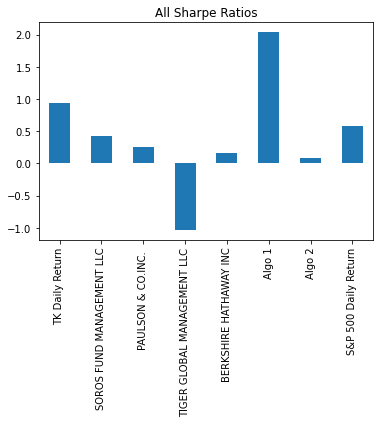

In [42]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratio.plot(kind = "bar", title = "All Sharpe Ratios");

### How does your portfolio do?

Based on the results and analysis that was performed, the Sharpe ratio for my portfolio did not exceed Algo 1's performance, however it was higher than all other portfolios.  